In [1]:
import os
os.listdir()

['second_model.ipynb',
 'train.csv',
 'DataCleaning.ipynb',
 'EDA.ipynb',
 'PA_201605-2012001更新R6(20190509).xlsx',
 'tag盤點表.xlsx',
 'xgboost.ipynb',
 'LSTM.ipynb',
 'train_FeatureSelected.csv',
 'feature select.ipynb',
 'tpot_pa_pipeline.py',
 'TPOT.ipynb',
 'three_model.ipynb',
 'cnn-time-stack.ipynb',
 '.ipynb_checkpoints']

# LOAD

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

In [3]:
df = pd.read_csv('train_FeatureSelected.csv',index_col = 0,parse_dates = True)
print(df.shape)
df.head()

(130795, 31)


,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,MLPAP_TI-0706B12,MLPAP_TI-0706B22,MLPAP_TI-0706B24,MLPAP_TI-0716A09,...,MLPAP_LIC-0738.PV,MLPAP_PIC-0761.PV,MLPAP_LRC-0729.PV,MLPAP_TIC-1721.PV,MLPAP_TRC-1734.PV,MLPAP_FR-0755.PV,MLPAP_FR-0791.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target
2016-05-10 08:10:00,421.996112,424.995929,398.999278,397.000005,394.002688,391.997199,391.004787,392.001755,392.004498,403.000684,...,34.707643,49.114940,34.926437,62.161964,181.607147,4.215451,13.177441,0.056350,0.054001,0.914110
2016-05-10 08:20:00,421.996112,425.041541,398.999278,397.000005,394.002688,391.997199,391.004787,392.001755,392.100484,403.000684,...,35.980597,49.137430,35.494560,62.267876,181.084756,4.236381,13.231014,0.084738,0.054001,0.919733
2016-05-10 08:30:00,421.996112,425.109958,398.999278,397.000005,394.002688,391.997199,391.004787,392.001755,392.004498,403.000684,...,33.797872,49.135555,34.616724,62.465860,177.599662,4.227079,13.221490,0.091835,0.054001,0.926436
2016-05-10 15:40:00,421.715731,427.687003,399.252972,395.446261,392.002989,389.622951,388.497742,390.200259,390.052790,403.578089,...,33.567251,49.169289,35.013840,62.394249,178.771310,4.248009,15.014401,0.496363,0.054001,0.887063
2016-05-10 23:40:00,421.003993,428.097506,397.996033,393.996100,390.654621,388.002611,387.000171,388.999261,388.197068,403.000684,...,35.167069,49.143052,34.719328,62.322638,182.122076,4.245102,15.637040,0.208935,0.054001,0.906869


# scale data

In [4]:
from sklearn.preprocessing import StandardScaler

x_col = df.drop('target',axis=1).columns.tolist()
y_col = 'target'

sc = StandardScaler()
df[x_col] = sc.fit_transform(df[x_col])

df.head()

,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,MLPAP_TI-0706B12,MLPAP_TI-0706B22,MLPAP_TI-0706B24,MLPAP_TI-0716A09,...,MLPAP_LIC-0738.PV,MLPAP_PIC-0761.PV,MLPAP_LRC-0729.PV,MLPAP_TIC-1721.PV,MLPAP_TRC-1734.PV,MLPAP_FR-0755.PV,MLPAP_FR-0791.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target
2016-05-10 08:10:00,7.655708,4.017088,-0.666210,-1.013852,-0.838141,-0.201993,0.267130,3.121524,6.479327,0.060260,...,-1.116894,-1.251285,-0.719921,3.100628,0.613273,-2.539731,-7.835288,-1.012290,-0.080748,0.914110
2016-05-10 08:20:00,7.655708,4.023903,-0.666210,-1.013852,-0.838141,-0.201993,0.267130,3.121524,6.511294,0.060260,...,-0.916856,-1.103782,-0.625884,3.273966,0.450188,-2.534609,-7.810934,-0.980202,-0.080748,0.919733
2016-05-10 08:30:00,7.655708,4.034125,-0.666210,-1.013852,-0.838141,-0.201993,0.267130,3.121524,6.479327,0.060260,...,-1.259860,-1.116074,-0.771185,3.597990,-0.637818,-2.536886,-7.815264,-0.972180,-0.080748,0.926436
2016-05-10 15:40:00,7.603536,4.419159,-0.610910,-1.357456,-1.203144,-0.575276,-0.049713,2.643787,5.829322,0.166637,...,-1.296101,-0.894820,-0.705453,3.480790,-0.272043,-2.531764,-7.000228,-0.514927,-0.080748,0.887063
2016-05-10 23:40:00,7.471100,4.480492,-0.884898,-1.678153,-1.449261,-0.830029,-0.238978,2.325295,5.211284,0.060260,...,-1.044698,-1.066906,-0.754202,3.363590,0.774028,-2.532475,-6.717185,-0.839817,-0.080748,0.906869


# stack time_step

In [5]:
def train_windows(df, ref_day=6*6, predict_day=1):
    X_train, Y_train, i_lst = [], [], []
    for i in tqdm(range(df.shape[0]-predict_day-ref_day)):
        X_train.append(np.array(df.iloc[i:i+ref_day][x_col]))
        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day+predict_day][y_col]))
        i_lst.append(df.iloc[i+ref_day:i+ref_day+predict_day].index[0])
    return np.array(X_train), np.array(Y_train), i_lst

In [6]:
X, y, i_lst = train_windows(df, ref_day=72, predict_day=1)
print(len(X),len(y),len(i_lst))

/workspace/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



130722 130722 130722


In [7]:
print(X.shape,y.shape)

(130722, 72, 30) (130722, 1)


# split

In [8]:
y = pd.DataFrame(y,index=i_lst,columns=['y'])

train_len = int(len(df)*0.8)

X_train,X_val_test = X[:train_len],X[train_len:]
y_train,y_val_test = y[:train_len],y[train_len:]

val_len = int(len(X_val_test)*0.5)

X_val,X_test = X_val_test[:val_len],X_val_test[val_len:]
y_val,y_test = y_val_test[:val_len],y_val_test[val_len:]

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(104636, 72, 30) (104636, 1)
(13043, 72, 30) (13043, 1)
(13043, 72, 30) (13043, 1)


# LSTM MODEL(manyToOne1)

In [9]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM,TimeDistributed,Dense,Flatten
from keras.optimizers import Adam
import warnings;warnings.simplefilter('ignore')

# define model
def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True,input_shape=shape))
    model.add(LSTM(64))
    model.add(Dense(32))
    model.add(Dense(1,kernel_initializer='uniform',activation='linear'))
    model.compile(optimizer=Adam(lr=0.0001), loss="mse", metrics=["mse"])
    model.summary()
    return model

# build model
model = buildManyToOneModel(X_train[0].shape)

Using TensorFlow backend.
/workspace/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/workspace/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/workspace/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/workspace/conda/lib/python3.6/site-packages/tensorflow/python/framework/d

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 72, 128)           81408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 132,929
Trainable params: 132,929
Non-trainable params: 0
_________________________________________________________________


# train model

In [10]:
history = model.fit(X_train,y_train,
                    batch_size = 256,
                    epochs = 10,
                    validation_data = (X_val,y_val),
                    verbose = 1)

Train on 104636 samples, validate on 13043 samples
Epoch 1/10
104636/104636 [==============================] - 79s 757us/step - loss: 0.0934 - mean_squared_error: 0.0934 - val_loss: 1.2458 - val_mean_squared_error: 1.2458
Epoch 2/10
104636/104636 [==============================] - 79s 751us/step - loss: 3.5099e-04 - mean_squared_error: 3.5099e-04 - val_loss: 0.8035 - val_mean_squared_error: 0.8035
Epoch 3/10
104636/104636 [==============================] - 75s 714us/step - loss: 1.3267e-04 - mean_squared_error: 1.3267e-04 - val_loss: 0.7553 - val_mean_squared_error: 0.7553
Epoch 4/10
104636/104636 [==============================] - 74s 709us/step - loss: 1.1052e-04 - mean_squared_error: 1.1052e-04 - val_loss: 0.7410 - val_mean_squared_error: 0.7410
Epoch 5/10
104636/104636 [==============================] - 73s 696us/step - loss: 1.0104e-04 - mean_squared_error: 1.0104e-04 - val_loss: 0.7389 - val_mean_squared_error: 0.7389
Epoch 6/10
104636/104636 [==============================] - 74

# evaluate model

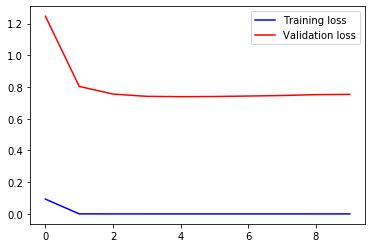

In [11]:
n = 0
plt.plot(history.history['loss'][n:], color='b', label="Training loss")
plt.plot(history.history['val_loss'][n:], color='r', label="Validation loss")
plt.legend()

# plot predict line

In [12]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def metric(y_true,y_pred,name):
    t = pd.DataFrame(index=[name])
    t['r2'] = r2_score(y_true,y_pred)
    t['rmse'] = sqrt(mean_squared_error(y_true,y_pred))
    t['mape'] = mape(y_true,y_pred)
    t = t.apply(lambda x:round(x,4))
    return t

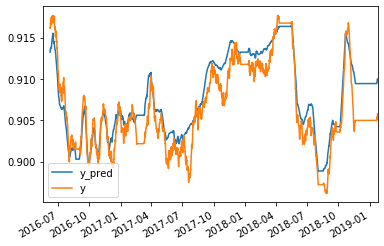

,r2,rmse,mape
train,0.2186,0.0093,0.7894


In [13]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

# predict
y_pred = model.predict(X_train).ravel()
y_pred = pd.DataFrame(y_pred,index=y_train.index,columns=['y_pred'])

# sort index
y_pred = y_pred.sort_index()
y_train = y_train.sort_index()

# plot
plot_data = pd.concat([y_pred,y_train],axis=1)
plot_data.rolling(6*24*15).mean().plot()
plt.show()

# score
metric(y_train,y_pred,'train')

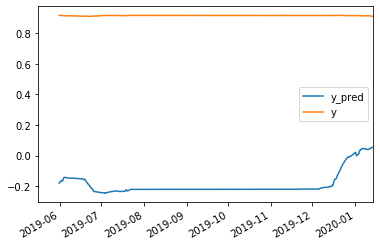

,r2,rmse,mape
test,-11625.3219,1.0572,114.1482


In [14]:
from sklearn.metrics import r2_score,mean_squared_error

# predict
y_pred = model.predict(X_test).ravel()
y_pred = pd.DataFrame(y_pred,index=y_test.index,columns=['y_pred'])

# sort index
y_pred = y_pred.sort_index()
y_test = y_test.sort_index()

# plot
plot_data = pd.concat([y_pred,y_test],axis=1)
plot_data.rolling(6*24*15).mean().plot()
plt.show()

# score
metric(y_test,y_pred,'test')